<a href="https://colab.research.google.com/github/charaf19/Tensorflow/blob/main/TensorFlow_minimal_example_365_DataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import the relevant libraries

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


### Data generation

We generate data using the exact same logic and code as the example from the previous notebook. The only difference now is that we save it to an npz file. Npz is numpy's file type which allows you to save numpy arrays into a single .npz file. We introduce this change because in machine learning most often: 

* you are given some data (csv, database, etc.)
* you preprocess it into a desired format (later on we will see methods for preprocesing)
* you save it into npz files (if you're working in Python) to access later

Nothing to worry about - this is literally saving your NumPy arrays into a file that you can later access, nothing more.

In [8]:
# First, we should declare a variable containing the size of the training set we want to generate.
observations = 1000

# We will work with two variables as inputs. You can think about them as x1 and x2 in our previous examples.
# We have picked x and z, since it is easier to differentiate them.
# We generate them randomly, drawing from an uniform distribution. There are 3 arguments of this method (low, high, size).
# The size of xs and zs is observations x 1. In this case: 1000 x 1.
xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

# Combine the two dimensions of the input into one input matrix. 
# This is the X matrix from the linear model y = x*w + b.
# column_stack is a Numpy method, which combines two matrices (vectors) into one.
generated_inputs = np.column_stack((xs,zs))

# We add a random small noise to the function i.e. f(x,z) = 2x - 3z + 5 + <small noise>
noise = np.random.uniform(-1, 1, (observations,1))

# Produce the targets according to our f(x,z) = 2x - 3z + 5 + noise definition.
# In this way, we are basically saying: the weights should be 2 and -3, while the bias is 5.
generated_targets = 2*xs - 3*zs + 5 + noise

# save into an npz file called "TF_intro"
np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)

### Solvign with tensorflow

In [ ]:
input_size=2
output_size=1

### Outlining the model

In [9]:
inputs = tf.compat.v1.placeholder(tf.float32,[None,input_size])
targets = tf.compat.v1.placeholder(tf.float32,[None,output_size])
weights = tf.Variable(tf.random.uniform([input_size,output_size],minval=-0.1,maxval=0.1))
biases = tf.Variable(tf.random.uniform([output_size],minval=-0.1,maxval=0.1))
outputs = tf.matmul(inputs,weights) + biases

### Choosing the objective function and the optimization method


In [16]:
mean_loss = tf.losses.mean_squared_error(labels=targets,predictions=outputs)/2.
optimize = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(mean_loss)

### Prepare for execution


In [12]:
sess = tf.InteractiveSession()

### Initializing the variables

In [13]:
initializer = tf.global_variables_initializer()
sess.run(initializer)

### Loading training data

In [14]:
training_data = np.load('TF_intro.npz')

### Learning

In [17]:
for e in range(100):
  _, curr_loss = sess.run([optimize,mean_loss],feed_dict={inputs: training_data['inputs'],targets:training_data['targets']})
  print(curr_loss)

249.48563
137.62772
77.60229
45.183113
27.512524
17.747055
12.235894
9.027383
7.0760036
5.8202295
4.957406
4.323547
3.8290415
3.4242713
3.081194
2.783459
2.5211122
2.2877383
2.078926
1.8914306
1.7227213
1.5707227
1.4336773
1.3100582
1.1985208
1.097868
1.007029
0.92504305
0.8510438
0.7842528
0.72396743
0.66955227
0.620437
0.57610464
0.53608924
0.49997064
0.46736932
0.43794274
0.41138172
0.38740686
0.3657669
0.34623426
0.3286037
0.3126899
0.29832593
0.28536072
0.27365783
0.26309472
0.25356022
0.24495429
0.23718634
0.23017496
0.22384603
0.2181336
0.2129772
0.20832317
0.20412232
0.2003305
0.19690803
0.19381876
0.1910304
0.18851341
0.1862416
0.18419094
0.18234009
0.18066949
0.17916153
0.17780046
0.17657183
0.17546289
0.17446192
0.1735585
0.17274307
0.17200693
0.17134252
0.17074284
0.17020148
0.16971292
0.16927192
0.16887382
0.16851455
0.16819024
0.16789752
0.16763331
0.16739477
0.1671795
0.16698515
0.16680978
0.16665149
0.1665086
0.16637965
0.16626324
0.16615814
0.1660633
0.16597769
0.16590

### Ploting the data

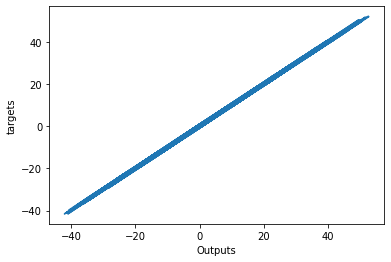

In [18]:
out = sess.run([outputs],feed_dict={inputs: training_data['inputs']})
plt.plot(np.squeeze(out),np.squeeze(training_data['targets']))
plt.xlabel('Outputs')
plt.ylabel('targets')
plt.show()